<a href="https://colab.research.google.com/github/Iulian99/EEG/blob/main/EEG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
from glob import glob
import numpy as np
import math
import os
from matplotlib import pyplot as plt
import scipy
from statistics import median
from scipy import stats
from scipy.stats import kurtosis
import re
from scipy.signal import savgol_filter
import numpy as np
from scipy import signal
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd


In [ ]:
!pip install mne
import mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 51.5 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
from glob import glob;
#Citirea datelor
data = glob('/content/drive/MyDrive/PIICM/S1/sub-001/ses-01/eeg/sub-001_ses-01_task-ssvep_eeg.edf')
print('Numarul de fisiere este',len(data))

#citire sanatosi
date_sanatosi = ['/content/drive/MyDrive/PIICM/S1/sub-001/ses-01/eeg/sub-001_ses-01_task-ssvep_eeg.edf']

# #citire pacienti
# date_bolnavi = [i for i in data if 's' in i.split('DataSet')[1]]

# print('Numarul de sanatosi este',len(date_sanatosi))
# print('Numarul de bolnavi este',len(date_bolnavi))




def citire_date_raw(cale):
  data = mne.io.read_raw_edf(cale,preload=True)
  epochs = mne.make_fixed_length_epochs(data,duration=5,overlap=1)
  array=epochs.get_data()
  return array

# s_r = date_sanatosi
# print(s_r)
# citire = citire_date_raw(s_r)

!pip install pyEDFlib
import pyedflib

def read_edf_file(file_path):
    edf_file = pyedflib.EdfReader(file_path)
    num_channels = edf_file.signals_in_file

    # Read the signals
    signals = []
    for i in range(num_channels):
        signal = edf_file.readSignal(i)
        signals.append(signal)

    # Get the sample rate
    sample_rate = edf_file.getSampleFrequency(0)  # Assuming all channels have the same sample rate

    # Get signal labels
    signal_labels = edf_file.getSignalLabels()

    # Close the EDF file
    edf_file.close()

    return signals, sample_rate, signal_labels

# def filtrare_date(cale):
#   data = mne.io.read_raw_edf(cale,preload=True)
#   data.filter(l_freq=2,h_freq=20)
#   epochs = mne.make_fixed_length_epochs(data,duration=5,overlap=0)
#   array=epochs.get_data()
#   array=data.get_data()
#   return array

# s_r = [citire_date_raw(i) for i in   date_sanatosi]
# b_r= [citire_date_raw(i) for i in date_bolnavi]

# s_f = [filtrare_date(i) for i in   date_sanatosi]
# b_f= [filtrare_date(i) for i in date_bolnavi]

Numarul de fisiere este 1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 34.9 MB/s eta 0:00:00


In [ ]:
val = read_edf_file(data)
print(val)

AttributeError: ignored

In [ ]:
import pyEDFlib

def read_edf_file(file_path):
    edf_file = pyEDFlib.EdfReader(file_path)
    num_channels = edf_file.signals_in_file

    # Read the signals
    signals = []
    for i in range(num_channels):
        signal = edf_file.readSignal(i)
        signals.append(signal)

    # Get the sample rate
    sample_rate = edf_file.getSampleFrequency(0)  # Assuming all channels have the same sample rate

    # Close the EDF file
    edf_file.close()

    return signals, sample_rate

In [ ]:
# Valoarea medie - suma(x)/N calculează media artitmetică de a lungul axei specificate
def valmedie(lista_numere):
  mean = np.mean(lista_numere,axis=-1)
  return mean
  #print("Valoarea medie = ",mean)

#Abaterea standard - Standard deviation
def deviationV(lista_numere):
  deviation = np.std(lista_numere, axis =-1)
  return deviation

#Valoarea minimă
def minVal(lista_numere):
  min = np.min(lista_numere, axis =-1)
  return min

#Valoarea maximă max
def maxVal(lista_numere):
  max = np.max(lista_numere, axis =-1)
  return max

#Argumentul maxim argmaxim input in lista_numere
def maxArg(lista_numere):
  argmaxim = np.argmax(lista_numere, axis=-1)
  return argmaxim

#Argumentul minim argmin-returnează indicii valorilor minime de a lungul unei axe
def minArg(lista_numere):
  argmin = np.argmin(lista_numere, axis=-1)
  return argmin

#Valoarea peak to peak returnează in tervalul de valori (maxim minim) de a lungul unei axe.
def peakToPeak(lista_numere):
  ptp = np.ptp(lista_numere, axis=-1)
  return ptp

#Varianța var returnează media deviațiilor pătratice ale unei variabile de la medie
def variantaM(lista_numere):
  var = np.var(lista_numere, axis=-1)
  return var

#Rădăcina medie pătrată root mean square
def rootMeanSquare(lista_numere):
  for i in lista_numere:
    square = np.power(lista_numere, 2)
  Sum = sum(square)
  rms = math.sqrt(Sum/len(lista_numere))
  return rms

#Diferența medie absolută Mean absolute difference
def mad(lista_numere):
  median_value = median(lista_numere)
  median_absolute_deviation = median([abs(number-median_value) for number in lista_numere])
  return median_absolute_deviation

#Asimetria skewness măsoară asimetria de distribuție a datelor
def skewnessAsymmetry(lista_numere):
  asymetry = stats.skew(lista_numere, axis=-1)
  return asymetry

#Direcționare kurtosis determină gradul de concentrație pe care îl prezintă valorile unei variabile în jurul zonei centrale a distribuției de frecvență
def kurtosis(lista_numere):
  k = stats.kurtosis(lista_numere, axis=-1)
  return k

listValMedie = []
listValMedie_ep = []

listDeviationV = []
listDeviationV_ep = []

listMin = []
listMin_ep = []

listMax = []
listMax_ep = []

listMaxArg = []
listMaxArg_ep = []

listMinArg = []
listMinArg_ep = []

listPtP = []
listPtP_ep = []

listVarianta = []
listVarianta_ep = []

listRMS = []
listRMS_ep = []

listMAD= []
listMAD_ep = []

listSkewness = []
listSkewness_ep = []

listKurtosis = []
listKurtosis_ep = []

for i in range(0, 100):
  list_ep = [int(x) for x in matrix_ep_citire_filtrata[i]]
  list_normal = [int(x) for x in matrix_normal_citire_filtrata[i]]

  listValMedie.append(valmedie(list_normal))
  listValMedie_ep.append(valmedie(list_ep))

  listDeviationV.append(deviationV(list_normal))
  listDeviationV_ep.append(deviationV(list_ep))

  listMin.append(minVal(list_normal))
  listMin_ep.append(minVal(list_ep))

  listMax.append(maxVal(list_normal))
  listMax_ep.append(maxVal(list_ep))

  listMaxArg.append(maxArg(list_normal))
  listMaxArg_ep.append(maxArg(list_ep))

  listMinArg.append(minArg(list_normal))
  listMinArg_ep.append(minArg(list_ep))

  listPtP.append(peakToPeak(list_normal))
  listPtP_ep.append(peakToPeak(list_ep))

  listVarianta.append(variantaM(list_normal))
  listVarianta_ep.append(variantaM(list_ep))

  listRMS.append(rootMeanSquare(list_normal))
  listRMS_ep.append(rootMeanSquare(list_ep))

  listMAD.append(mad(list_normal))
  listMAD_ep.append(mad(list_ep))

  listSkewness.append(skewnessAsymmetry(list_normal))
  listSkewness_ep.append(skewnessAsymmetry(list_ep))

  listKurtosis.append(kurtosis(list_normal))
  listKurtosis_ep.append(kurtosis(list_ep))

In [ ]:
print("Media =",listValMedie) #len(listValMedie) = 100
print("Abaterea Standard =",listDeviationV)
print("Min =", listMin)
print("Max =", listMax)
print("Argumentul Maxim =", listMaxArg)
print("Argumentul Minim =", listMinArg)
print("Peak to Peak =", listPtP)
print("Varianta =", listVarianta)
print("Radacina medie patrata =",listRMS)
print("Diferenta medie absoluta =",listMAD)
print("Asimetrie Skewness =", listSkewness)
print("Lista Kurtosis =", listKurtosis)
print("")
print("Epileptic - Media =",listValMedie_ep) #len(listValMedie) = 100
print("Epileptic - Abaterea Standard =",listDeviationV_ep)
print("Epileptic - Min =", listMin_ep)
print("Epileptic - Max =", listMax_ep)
print("Epileptic - Argumentul Maxim =", listMaxArg_ep)
print("Epileptic - Argumentul Minim =", listMinArg_ep)
print("Epileptic - Peak to Peak =", listPtP_ep)
print("Epileptic - Varianta =", listVarianta_ep)
print("Epileptic - Radacina medie patrata =",listRMS_ep)
print("Epileptic - Diferenta medie absoluta =",listMAD_ep)
print("Epileptic - Asimetrie Skewness =", listSkewness_ep)
print("Epileptic - Lista Kurtosis =", listKurtosis_ep)

Media = [0.21259458140102513, 2.7090554063949233, -3.056626800097632, 0.8955333170612644, 1.8657554308030266, -1.0280693190139125, 2.3292653160849404, -1.7329753478154748, 5.839638760068342, 7.815474737612887, -1.6585306321698805, 0.74762020990969, -1.20136685379546, -8.166219184769343, 0.6541371735416158, 0.15962899682694653, -1.3487917988772273, -3.1530388088845496, 5.474249450817672, 4.38638027825238, -0.7251647546985599, -1.3907737368806443, -1.7554308030266048, -0.028557481083719794, 0.004149377593360996, 1.8225530876250915, -1.5040273370759092, 1.966804979253112, 2.036123993165731, 0.5252623871125214, -0.2914327556748841, 3.5469855992189405, 5.08640468635587, -6.305345374664388, -0.9079814498413473, -4.9648523309738835, 2.938003417134489, -0.4444715645594337, 2.2313888210886015, 0.6150842079570418, -2.0778618501342447, -1.1244813278008299, -0.20039052965584575, -0.4942640956797657, -1.3651452282157677, 0.6358310959238467, -0.8977300463753967, 1.371491335123261, 0.3749084696119111

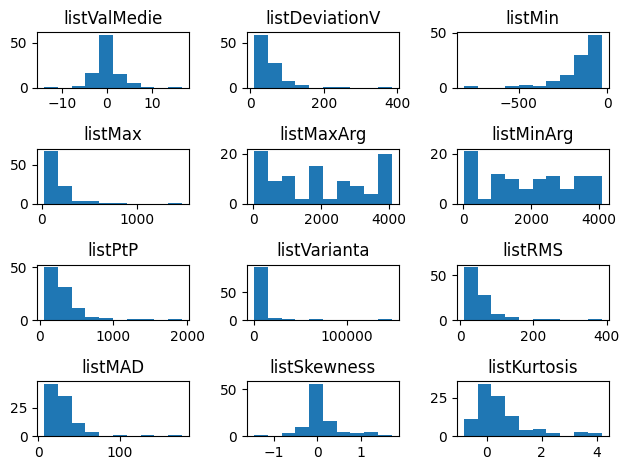

In [ ]:
#vectorul de caracteristici
vector_b = [listValMedie_ep, listDeviationV_ep, listMin_ep, listMax_ep, listMaxArg_ep, listMinArg_ep,listPtP_ep,listVarianta_ep,listRMS_ep,listMAD_ep,listSkewness_ep,listKurtosis_ep]
stringC = ["listValMedie", "listDeviationV", "listMin", "listMax", "listMaxArg", "listMinArg","listPtP","listVarianta","listRMS","listMAD","listSkewness","listKurtosis"]

# Creează o figură cu 4 rânduri și 3 coloane
fig, axes = plt.subplots(4, 3)

# Afișează fiecare histogramă într-un subplot corespunzător
for i, lista in enumerate(vector_b):
    # Calculează histogramele
    hist, bins = np.histogram(lista)

    # Afișează histograma în subplot corespunzător
    ax = axes[i // 3, i % 3]
    ax.hist(lista, bins=bins)

    # Setează titlul subplot-ului cu numele listei
    ax.set_title(stringC[i])


# Ajustează spațiile între subplote pentru a fi mai ușor de citit
plt.tight_layout()

# Afișează figura
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Vector de caracteristici - Concatenarea tuturor caracteristicilor într o matrice
concatenate = np.column_stack((listValMedie,listDeviationV,listMin,listMax,listMaxArg,listMinArg,listPtP,listVarianta,listRMS,listMAD,listSkewness,listKurtosis))
concatenate_ep = np.column_stack((listValMedie_ep,listDeviationV_ep,listMin_ep,listMax_ep,listMaxArg_ep,listMinArg_ep,listPtP_ep,listVarianta_ep,listRMS_ep,listMAD_ep,listSkewness_ep,listKurtosis_ep))
# print(len(concatenate))
# print(len(concatenate_ep))

vCaract = np.concatenate((concatenate,concatenate_ep),axis=-1)

# Vector de etichete
zeros = np.zeros(50, dtype=int)  # Crează un vector cu 50 de elemente de 0
ones = np.ones(50, dtype=int)    # Crează un vector cu 50 de elemente de 1
zerosOnes = np.concatenate((zeros, ones))  # Concatenează cele două vectori
print(zerosOnes)
x = vCaract
y = zerosOnes

# y =  np.random.choice([0, 1], size=100)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


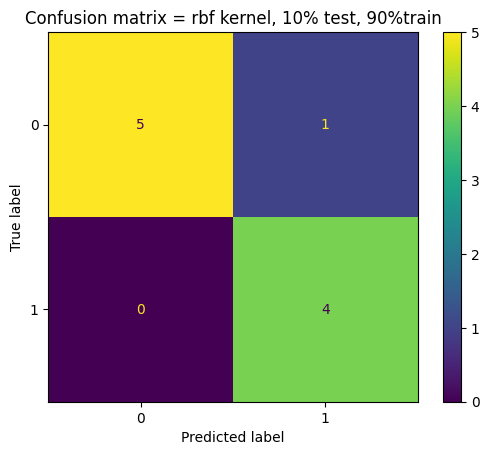

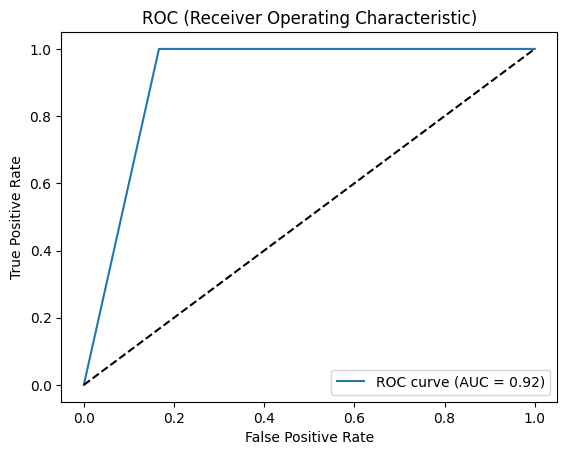

In [ ]:
# Împărțirea setului de date în set de antrenament și test.
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.1, random_state=35)

# Scalarea caracteristicilor:
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

#Kernel radial - 90%train, 10% test
classifier = SVC(kernel='rbf', random_state=100)
classifier.fit(x_train,y_train)

# K-Nearest Neighbor
# scores = []
# classifier = KNeighborsClassifier(n_neighbors=3)
# classifier.fit(x_train, y_train)
# score = classifier.score(x_test, y_test)  # performanța pe setul de validare
# scores.append(score)

# realizarea predictiilor pe datele de test
y_pred10_rbf= classifier.predict(x_test)
# print(y_pred10_rbf)
# print("ypred = ",len(y_pred10_rbf))

# Calcularea masurilor de evaluare a performantei:
accuracy10_rbf = accuracy_score(y_test,y_pred10_rbf)*100
precision10_rbf = precision_score(y_test,y_pred10_rbf)*100
recall10_rbf = recall_score(y_test,y_pred10_rbf)*100
# print(accuracy10_rbf)
# print(precision10_rbf)
# print(recall10_rbf)

#Se calculează matricea de confuzie pe baza predicțiilor și etichetelor de test
confusion_matrix_10 = confusion_matrix(y_test,y_pred10_rbf,labels=None,sample_weight=None,normalize=None)
confusionMatrixDisplay10_rbf = ConfusionMatrixDisplay(confusion_matrix_10,display_labels = None)
confusionMatrixDisplay10_rbf.plot()
plt.title('Confusion matrix = rbf kernel, 10% test, 90%train')

from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred10_rbf)
# Calcularea ariei de sub curba ROC (AUC-ROC)
auc = roc_auc_score(y_test, y_pred10_rbf)

# Curba ROC
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Linie diagonală de referință
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC (Receiver Operating Characteristic)')
plt.legend()
plt.show()


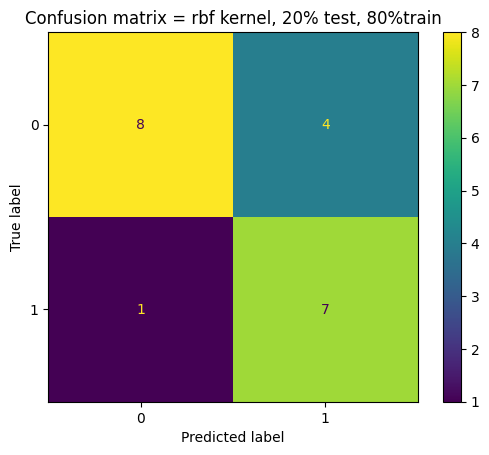

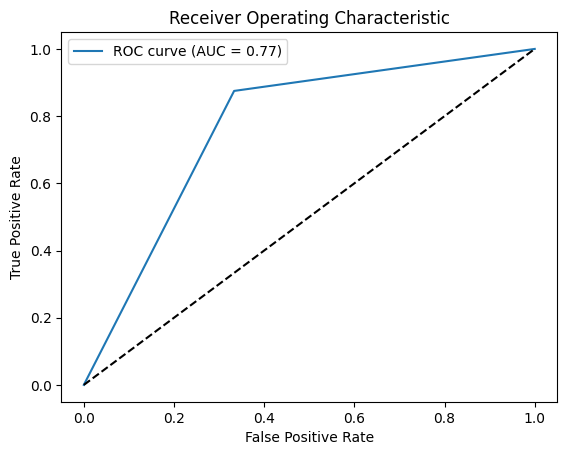

In [ ]:
# Splitting the dataset into training and test set.
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=473)


# Scalarea caracteristicilor:
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

#Kernel radial - 80%train, 20% test
classifier = SVC(kernel='rbf', random_state=100)
classifier.fit(x_train,y_train)

# K-Nearest Neighbor
# scores = []
# classifier = KNeighborsClassifier(n_neighbors=3)
# classifier.fit(x_train, y_train)
# score = classifier.score(x_test, y_test)  # evaluează performanța pe setul de validare
# scores.append(score)

# realizarea predictiilor pe datele de test
y_pred20_rbf= classifier.predict(x_test)
# print(y_pred20_rbf)
# print("ypred = ",len(y_pred20_rbf))

# Calcularea masurilor de evaluare a performantei:
accuracy20_rbf = accuracy_score(y_test,y_pred20_rbf)*100
precision20_rbf = precision_score(y_test,y_pred20_rbf)*100 #, zero_division=1
recall20_rbf = recall_score(y_test,y_pred20_rbf)*100
# print(accuracy20_rbf)
# print(precision20_rbf)
# print(recall20_rbf)

#Se calculează matricea de confuzie pe baza predicțiilor și etichetelor de test
confusion_matrix_20 = confusion_matrix(y_test,y_pred20_rbf,labels=None,sample_weight=None,normalize=None)
confusionMatrixDisplay20_rbf = ConfusionMatrixDisplay(confusion_matrix_20,display_labels = None)
confusionMatrixDisplay20_rbf.plot()
plt.title('Confusion matrix = rbf kernel, 20% test, 80%train')

from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred20_rbf)
# Calcularea ariei de sub curba ROC (AUC-ROC)
auc = roc_auc_score(y_test, y_pred20_rbf)

# Afișarea curbei ROC
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Linie diagonală de referință
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()


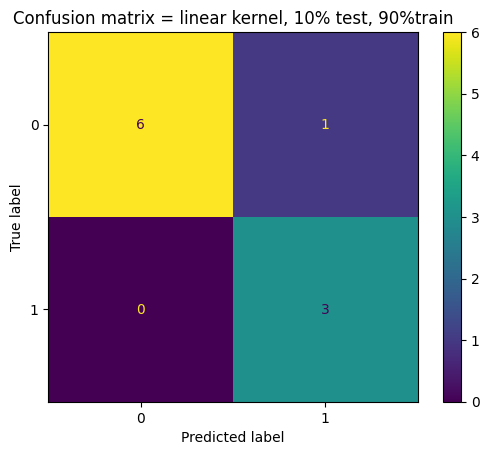

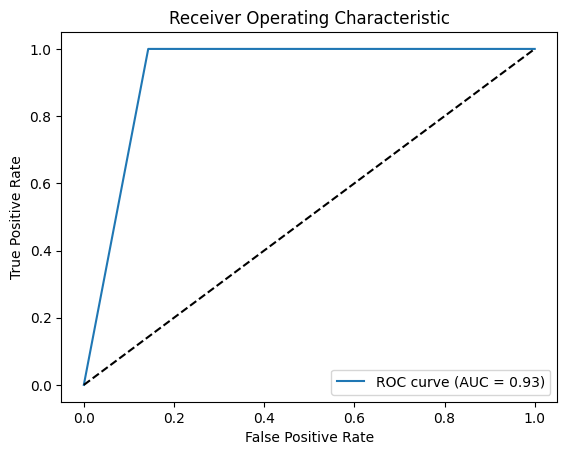

In [ ]:
# Splitting the dataset into training and test set
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.1, random_state=96)


# Scalarea caracteristicilor:
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

#Kernel linear - 90%train, 10% test
classifier = SVC(kernel='linear', random_state=100)
classifier.fit(x_train,y_train)

# K-Nearest Neighbor
# scores = []
# classifier = KNeighborsClassifier(n_neighbors=5)
# classifier.fit(x_train, y_train)
# score = classifier.score(x_test, y_test)  # evaluează performanța pe setul de validare
# scores.append(score)

# realizarea predictiilor pe datele de test
y_pred_10_linear= classifier.predict(x_test)
# print(y_pred_10_linear)
# print("ypred = ",len(y_pred_10_linear))

# Calcularea masurilor de evaluare a performantei:
accuracy10_linear = accuracy_score(y_test,y_pred_10_linear)*100
precision10_linear = precision_score(y_test,y_pred_10_linear)*100 #, zero_division=1
recall10_linear = recall_score(y_test,y_pred_10_linear)*100
# print(accuracy10_linear)
# print(precision10_linear)
# print(recall10_linear)

#Se calculează matricea de confuzie pe baza predicțiilor și etichetelor de test
confusion_matrix_10_linear = confusion_matrix(y_test,y_pred_10_linear,labels=None,sample_weight=None,normalize=None)
confusionMatrixDisplay10 = ConfusionMatrixDisplay(confusion_matrix_10_linear,display_labels = None)
confusionMatrixDisplay10.plot()
plt.title('Confusion matrix = linear kernel, 10% test, 90%train')


from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_10_linear)
# Calcularea ariei de sub curba ROC (AUC-ROC)
auc = roc_auc_score(y_test, y_pred_10_linear)

# Afișarea curbei ROC
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Linie diagonală de referință
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

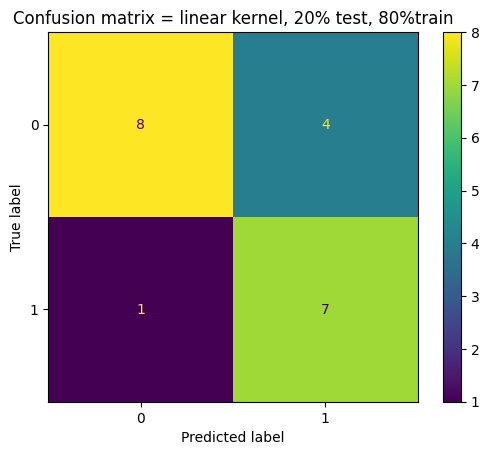

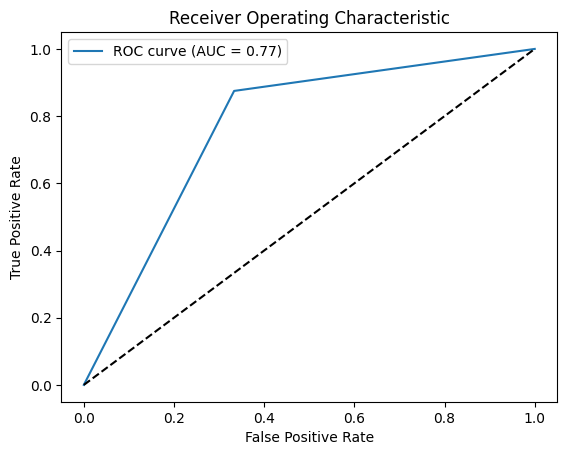

In [ ]:
# Splitting the dataset into training and test set.

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=473)

# Scalarea caracteristicilor:
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)


from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.svm import SVC # "Support vector classifier"


#Kernel linear - 80%train, 20% test
classifier = SVC(kernel='linear', random_state=100)
classifier.fit(x_train,y_train)

# K-Nearest Neighbor
# scores = []
# classifier = KNeighborsClassifier(n_neighbors=3)
# classifier.fit(x_train, y_train)
# score = classifier.score(x_test, y_test)  # evaluează performanța pe setul de validare
# scores.append(score)

y_pred_20_linear= classifier.predict(x_test)
# print(y_pred_20_linear)
# print("ypred = ",len(y_pred_20_linear))

# Calcularea masurilor de evaluare a performantei:
accuracy20_linear = accuracy_score(y_test,y_pred_20_linear)*100
precision20_linear = precision_score(y_test,y_pred_20_linear)*100 #, zero_division=1
recall20_linear = recall_score(y_test,y_pred_20_linear)*100
# print(accuracy20_linear)
# print(precision20_linear)
# print(recall20_linear)

#Se calculează matricea de confuzie pe baza predicțiilor și etichetelor de test
confusion_matrix_20_linear = confusion_matrix(y_test,y_pred_20_linear,labels=None,sample_weight=None,normalize=None)
confusionMatrixDisplay20 = ConfusionMatrixDisplay(confusion_matrix_20_linear,display_labels = None)
confusionMatrixDisplay20.plot()
plt.title('Confusion matrix = linear kernel, 20% test, 80%train')


from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_20_linear)
# Calcularea ariei de sub curba ROC (AUC-ROC)
auc = roc_auc_score(y_test, y_pred_20_linear)

# Afișarea curbei ROC
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Linie diagonală de referință
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()


#Definirea modelului
# sc_X = StandardScaler()
# X_train = sc_X.fit_transform(x_train)
# X_test=sc_X.transform(x_test)

# classifier=KNeighborsClassifier(n_neighbors=,p=2, metric="euclidean")
# scores = []
# for k in range(1, 21):  # încercă diferite valori ale lui n_neighbors (de la 1 la 20)
#     classifier = KNeighborsClassifier(n_neighbors=k)
#     classifier.fit(x_train, y_train)
#     score = classifier.score(x_test, y_test)  # evaluează performanța pe setul de validare
#     scores.append(score)
# print()
#Antrenare model